In [17]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt

In [18]:
# initialize data frames
df_day_ahead_energy_price = pd.read_csv('data/day_ahead_energy_price.csv')
df_generation_by_source = pd.read_csv('data/generation_by_source.csv')
df_historical_power_load = pd.read_csv('data/historical_power_load.csv')

## day_ahead_energy_price price cyclicality

In [19]:
# head of day ahead energy price
df_day_ahead_energy_price.head()

,datetime_beginning_utc,datetime_beginning_ept,pnode_id,pnode_name,voltage,equipment,type,zone,system_energy_price_da,total_lmp_da,congestion_price_da,marginal_loss_price_da,row_is_current,version_nbr
0,10/6/2023 4:00:00 AM,10/6/2023 12:00:00 AM,1,PJM-RTO,NaN,NaN,ZONE,NaN,20.98,21.284320,0.227086,0.077234,True,1
1,10/6/2023 5:00:00 AM,10/6/2023 1:00:00 AM,1,PJM-RTO,NaN,NaN,ZONE,NaN,19.40,19.472430,-0.004559,0.076990,True,1
2,10/6/2023 6:00:00 AM,10/6/2023 2:00:00 AM,1,PJM-RTO,NaN,NaN,ZONE,NaN,17.80,18.063099,0.207948,0.055151,True,1
3,10/6/2023 7:00:00 AM,10/6/2023 3:00:00 AM,1,PJM-RTO,NaN,NaN,ZONE,NaN,17.24,17.607010,0.310196,0.056814,True,1
4,10/6/2023 8:00:00 AM,10/6/2023 4:00:00 AM,1,PJM-RTO,NaN,NaN,ZONE,NaN,18.04,18.391899,0.294921,0.056978,True,1


pnode_id: PNode is a specific location on the electrical grid where prices are established for buying or selling energy.

pnode_name: The name or label associated with the PNode

voltage: The voltage level at the PNode. May affect energy prices because different voltage levels (e.g., high or low) can reflect varying costs of energy transmission or distribution.

equipment: The type of equipment at the PNode, which might influence energy pricing due to differences in transmission efficiency or operational costs.

type: Type of pricing node or equipment type, possibly indicating whether it is a generation point, load point, or transmission node.

zone: The geographic or market zone in which the PNode is located. Different zones might have varying prices based on local supply and demand.

system_energy_price_da: System-wide Day-Ahead energy price. Forecast price for electricity delivered the next day, across the entire energy grid system.

total_lmp_da: The Total Locational Marginal Price (LMP) for the day ahead. LMP includes the system energy price plus the cost of congestion and marginal losses specific to the PNode.

congestion_price_da: The portion of the LMP due to congestion costs, which arise when transmission capacity limits are reached, causing energy prices to rise in specific nodes.

marginal_loss_price_da: The portion of the LMP attributable to marginal losses (i.e., the energy lost as heat during transmission). This affects the final price of electricity.

row_is_current: Flag indicating whether the data row is the most recent record for this specific combination of PNode and time.

version_nbr: The version number of the data record, which may indicate updates or revisions to the dataset.

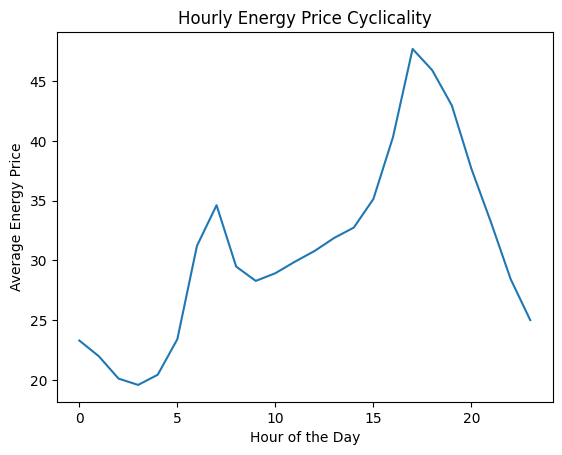

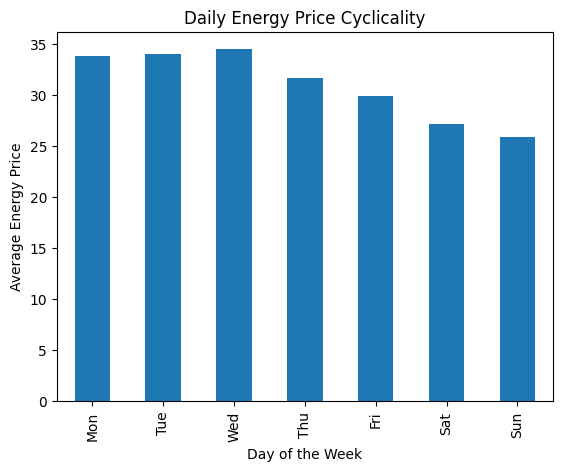

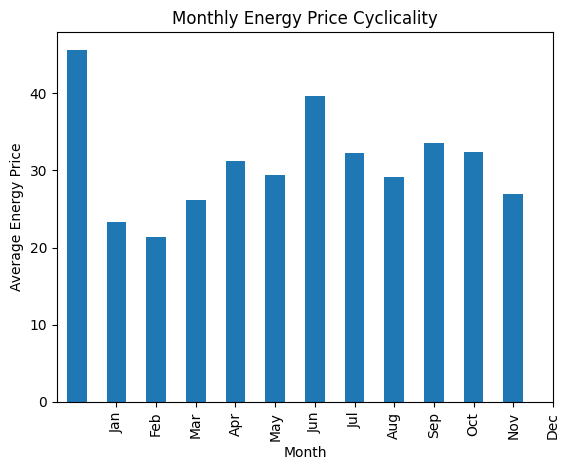

In [20]:
# Ensure the datetime column is in datetime format
df_day_ahead_energy_price['datetime_beginning_ept'] = pd.to_datetime(df_day_ahead_energy_price['datetime_beginning_ept'])

# Extract hour, day of the week, and month
df_day_ahead_energy_price['hour'] = df_day_ahead_energy_price['datetime_beginning_ept'].dt.hour
df_day_ahead_energy_price['day_of_week'] = df_day_ahead_energy_price['datetime_beginning_ept'].dt.dayofweek  # Monday=0, Sunday=6
df_day_ahead_energy_price['month'] = df_day_ahead_energy_price['datetime_beginning_ept'].dt.month

# Group by hour and calculate the mean system energy price
hourly_group = df_day_ahead_energy_price.groupby('hour')['system_energy_price_da'].mean()

# Plot the hourly cyclicality
hourly_group.plot(kind='line', title='Hourly Energy Price Cyclicality', ylabel='Average Energy Price', xlabel='Hour of the Day')
plt.show()

# Group by day of the week and calculate the mean system energy price
daily_group = df_day_ahead_energy_price.groupby('day_of_week')['system_energy_price_da'].mean()

# Plot the daily cyclicality
daily_group.plot(kind='bar', title='Daily Energy Price Cyclicality', ylabel='Average Energy Price', xlabel='Day of the Week')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

# Group by month and calculate the mean system energy price
monthly_group = df_day_ahead_energy_price.groupby('month')['system_energy_price_da'].mean()

# Plot the monthly cyclicality
monthly_group.plot(kind='bar', title='Monthly Energy Price Cyclicality', ylabel='Average Energy Price', xlabel='Month')
plt.xticks(ticks=range(1,13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


## generation_by_source net load cyclicality

In [21]:
# head of generation by source
df_generation_by_source.head()

,datetime_beginning_utc,datetime_beginning_ept,fuel_type,mw,fuel_percentage_of_total,is_renewable
0,10/6/2024 4:00:00 AM,10/6/2024 12:00:00 AM,Coal,9059,0.119,False
1,10/6/2024 4:00:00 AM,10/6/2024 12:00:00 AM,Gas,25884,0.341,False
2,10/6/2024 4:00:00 AM,10/6/2024 12:00:00 AM,Hydro,775,0.010,True
3,10/6/2024 4:00:00 AM,10/6/2024 12:00:00 AM,Multiple Fuels,1826,0.024,False
4,10/6/2024 4:00:00 AM,10/6/2024 12:00:00 AM,Nuclear,30465,0.402,False


fuel_type: Type of fuel used for energy generation. ('Coal', 'Gas', 'Hydro', 'Multiple Fuels', 'Nuclear', 'Oil', 'Other Renewables', 'Solar', 'Storage', 'Wind’) 

mw: Amount of power generated fuel type, measured in megawatts (MW). 

fuel_percentage_of_total: Percentage of total energy generation attributed to this specific fuel type. Contribution of each fuel source to the overall energy mix.

is_renewable: A boolean flag (True/False) indicating whether the fuel type is considered renewable

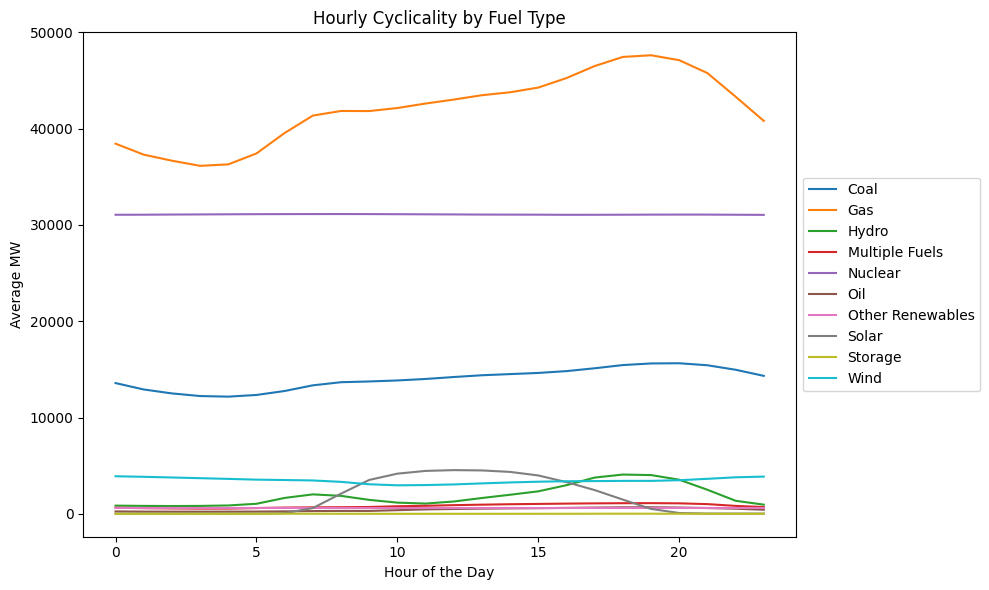

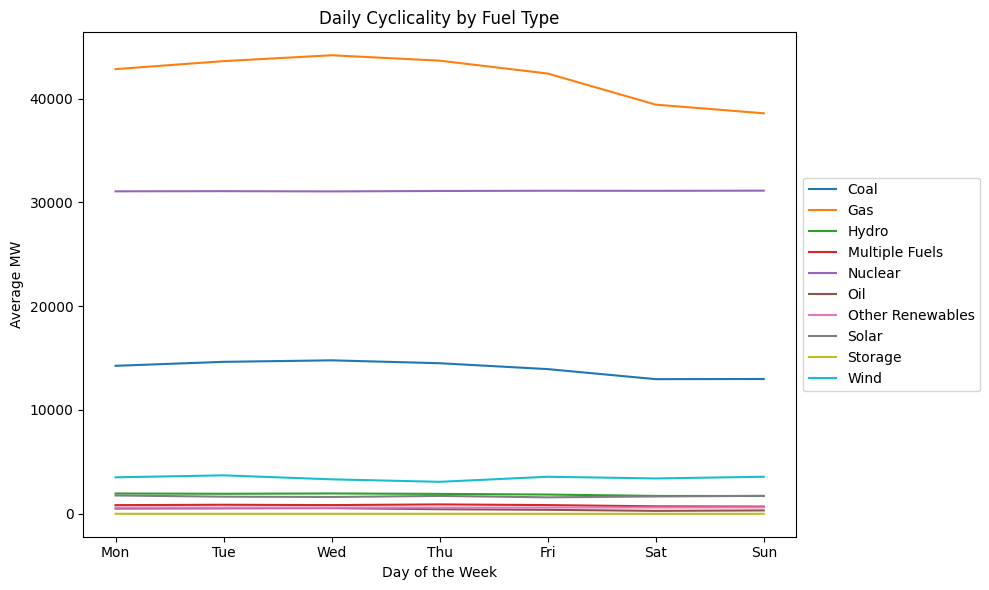

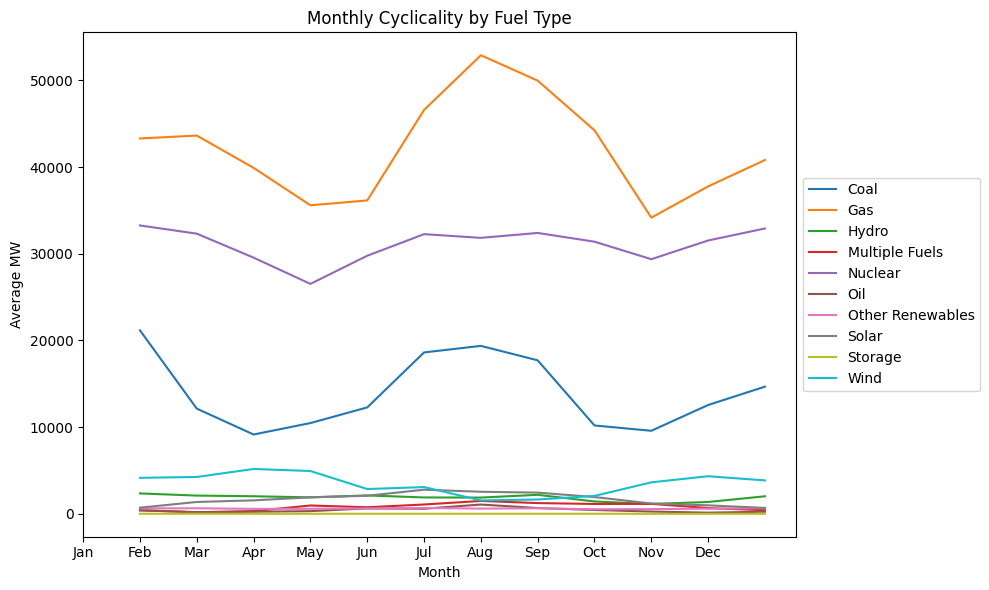

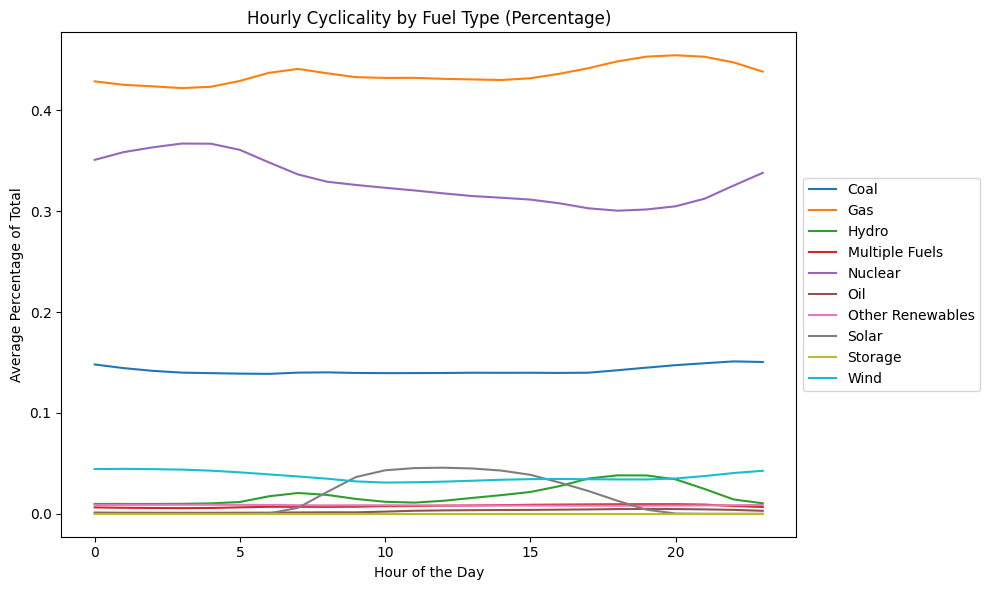

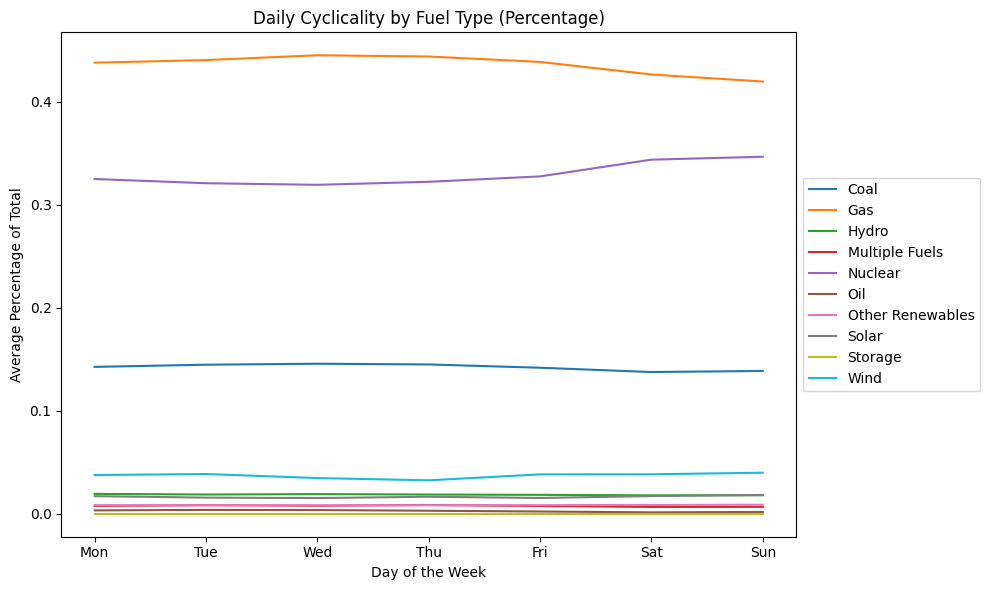

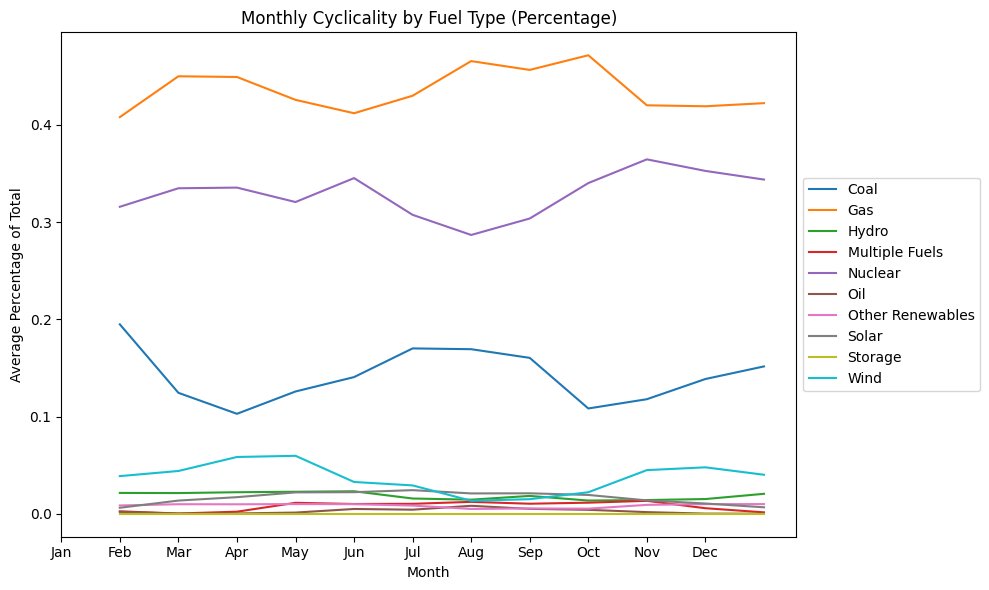

In [22]:
# Ensure the datetime column is in datetime format
df_generation_by_source['datetime_beginning_ept'] = pd.to_datetime(df_generation_by_source['datetime_beginning_ept'])

# Extract hour, day of the week, and month
df_generation_by_source['hour'] = df_generation_by_source['datetime_beginning_ept'].dt.hour
df_generation_by_source['day_of_week'] = df_generation_by_source['datetime_beginning_ept'].dt.dayofweek  # Monday=0, Sunday=6
df_generation_by_source['month'] = df_generation_by_source['datetime_beginning_ept'].dt.month

def plot_cyclicality(df, time_feature, value_column, title, ylabel, xlabel, xtick_labels=None):
    group = df.groupby(['fuel_type', time_feature])[value_column].mean().unstack()
    group.T.plot(kind='line', figsize=(10, 6), title=title, ylabel=ylabel, xlabel=xlabel)
    
    if xtick_labels:
        plt.xticks(ticks=range(len(xtick_labels)), labels=xtick_labels)
    
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    plt.show()
    
# hourly cyclicality for each fuel type
plot_cyclicality(df_generation_by_source, 'hour', 'mw', 
                 title='Hourly Cyclicality by Fuel Type', 
                 ylabel='Average MW', xlabel='Hour of the Day')

# daily cyclicality for each fuel type
plot_cyclicality(df_generation_by_source, 'day_of_week', 'mw', 
                 title='Daily Cyclicality by Fuel Type', 
                 ylabel='Average MW', xlabel='Day of the Week', 
                 xtick_labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# monthly cyclicality for each fuel type
plot_cyclicality(df_generation_by_source, 'month', 'mw', 
                 title='Monthly Cyclicality by Fuel Type', 
                 ylabel='Average MW', xlabel='Month', 
                 xtick_labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])


# hourly cyclicality for each fuel type by percentage
plot_cyclicality(df_generation_by_source, 'hour', 'fuel_percentage_of_total', 
                 title='Hourly Cyclicality by Fuel Type (Percentage)', 
                 ylabel='Average Percentage of Total', xlabel='Hour of the Day')

# daily cyclicality for each fuel type by percentage
plot_cyclicality(df_generation_by_source, 'day_of_week', 'fuel_percentage_of_total', 
                 title='Daily Cyclicality by Fuel Type (Percentage)', 
                 ylabel='Average Percentage of Total', xlabel='Day of the Week', 
                 xtick_labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# monthly cyclicality for each fuel type by percentage
plot_cyclicality(df_generation_by_source, 'month', 'fuel_percentage_of_total', 
                 title='Monthly Cyclicality by Fuel Type (Percentage)', 
                 ylabel='Average Percentage of Total', xlabel='Month', 
                 xtick_labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

## historical_power_load cyclicality

In [23]:
# head of historical power load
df_historical_power_load.head()

,evaluated_at_utc,evaluated_at_ept,forecast_hour_beginning_utc,forecast_hour_beginning_ept,forecast_area,forecast_load_mw
0,10/5/2023 9:45:00 AM,10/5/2023 5:45:00 AM,10/6/2023 4:00:00 AM,10/6/2023 12:00:00 AM,AEP,12161
1,10/5/2023 1:45:00 PM,10/5/2023 9:45:00 AM,10/6/2023 4:00:00 AM,10/6/2023 12:00:00 AM,AEP,12212
2,10/5/2023 3:45:00 PM,10/5/2023 11:45:00 AM,10/6/2023 4:00:00 AM,10/6/2023 12:00:00 AM,AEP,12212
3,10/5/2023 9:45:00 PM,10/5/2023 5:45:00 PM,10/6/2023 4:00:00 AM,10/6/2023 12:00:00 AM,AEP,12212
4,10/6/2023 3:45:00 AM,10/5/2023 11:45:00 PM,10/6/2023 4:00:00 AM,10/6/2023 12:00:00 AM,AEP,12212


evaluated_at_utc: The time in Coordinated Universal Time (UTC) when the forecast data was evaluated or generated. 

evaluated_at_ept: The same evaluation time as above, but in Eastern Prevailing Time (EPT), adjusted for daylight savings. 

forecast_hour_beginning_utc: The start of the forecasted hour in UTC. 

forecast_hour_beginning_ept: The same forecast hour start as above, but in EPT. 

forecast_area: The geographic or operational area for which the energy load is being forecasted. Different areas may have different demand profiles, influencing day-ahead prices.
- AEP: American Electric Power – A large utility company serving parts of the Midwest and Southern U.S. within the PJM territory.
- APS: Allegheny Power System (now part of FirstEnergy) –  Pennsylvania, Maryland, and West Virginia.
- COMED: Commonwealth Edison – Northern Illinois, including the Chicago metropolitan area.
- DEOK: Duke Energy Ohio/Kentucky – Southern Ohio and northern Kentucky.
- DOM: Dominion Energy – Parts of Virginia and northeastern North Carolina.
- DAY: Dayton Power & Light (now AES Ohio) – Serves the Dayton, Ohio area.
- DUQ: Duquesne Light – Pittsburgh, Pennsylvania area.
- EKPC: East Kentucky Power Cooperative – Rural areas in Kentucky.
- ATSI: American Transmission Systems, Inc. (Subsidiary of FirstEnergy) – Parts of Ohio and Pennsylvania.
- MIDATL: Mid-Atlantic Region (PJM) – Mid-Atlantic states like Maryland, New Jersey, and parts of Pennsylvania.
- RTO: Regional Transmission Organization (Broader PJM grid)– All the regions under JPM operation.

forecast_load_mw: The forecasted electrical load (demand) for the specified area and time, measured in megawatts (MW).

  forecast_hour_beginning_utc  forecast_load_mw    mw  net_load_mw
0         2023-10-06 04:00:00             12161  5138         7023
1         2023-10-06 04:00:00             12212  5138         7074
2         2023-10-06 04:00:00             12212  5138         7074
3         2023-10-06 04:00:00             12212  5138         7074
4         2023-10-06 04:00:00             12212  5138         7074


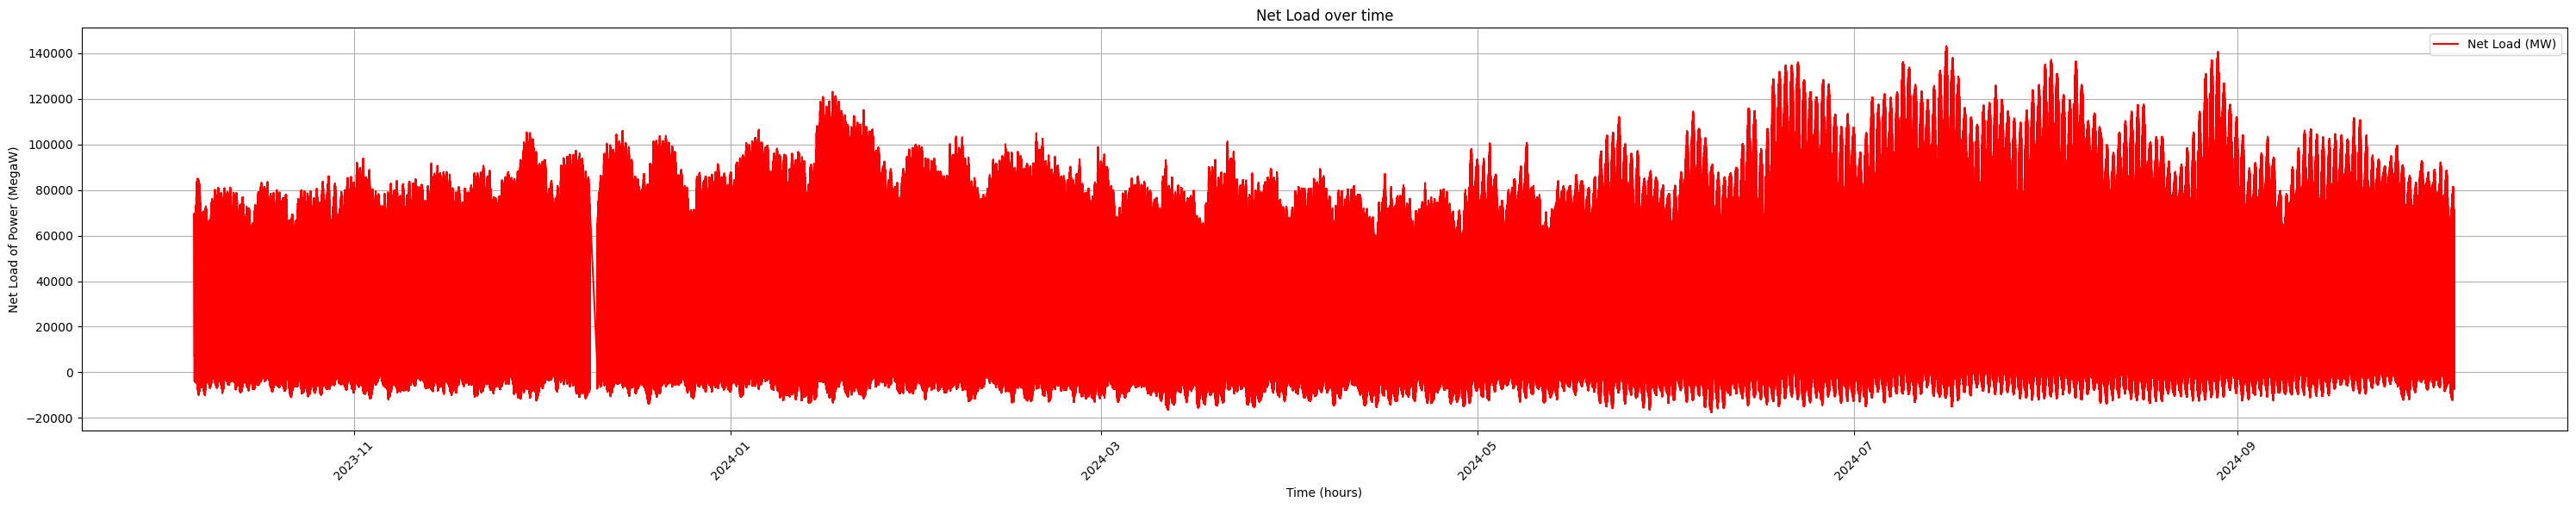

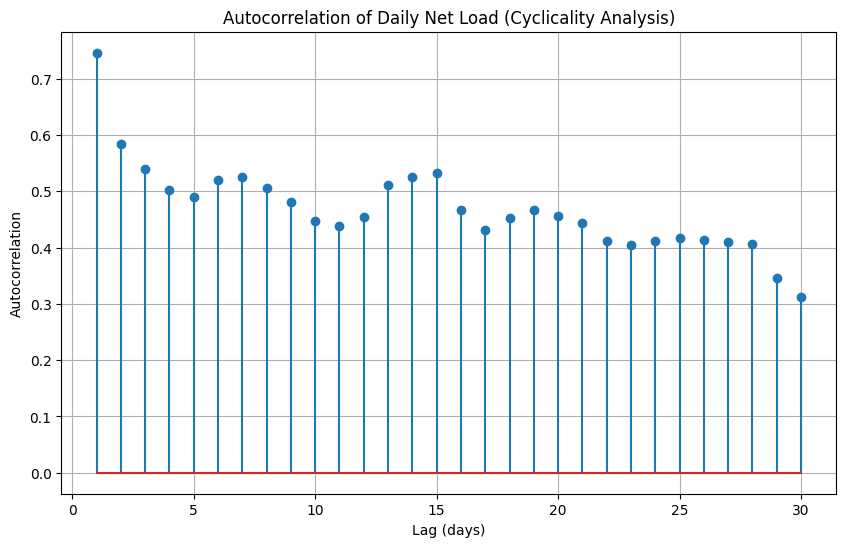

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

generation_data = pd.read_csv('data/generation_by_source.csv')
load_data = pd.read_csv('data/historical_power_load.csv')

# We display rows of each dataset to understand their structure

# Now convert the datetime columns to objects for them to align and merge
generation_data.head(), load_data.head()
generation_data['datetime_beginning_utc'] = pd.to_datetime(generation_data['datetime_beginning_utc']) 
load_data['forecast_hour_beginning_utc'] = pd.to_datetime(load_data['forecast_hour_beginning_utc'])

# Filter the generation data to only include renewable sources (is_renewable == True)
renewable_generation = generation_data[generation_data['is_renewable']]
renewable_generation_agg = renewable_generation.groupby('datetime_beginning_utc')['mw'].sum().reset_index() # by hour
clean_data = pd.merge(load_data, renewable_generation_agg, left_on='forecast_hour_beginning_utc', right_on='datetime_beginning_utc', how='left') # Merge the renewable generation data with the load data
clean_data['mw'].fillna(0, inplace=True)

clean_data['net_load_mw'] = clean_data['forecast_load_mw'] - clean_data['mw'] # Calculate the net load as total load minus renewable generation

net_load_data = clean_data[['forecast_hour_beginning_utc', 'forecast_load_mw', 'mw', 'net_load_mw']]
output_path = 'output_data/net_load_data.csv'
net_load_data.to_csv(output_path, index=False)
print(net_load_data.head())

# Plot net load
plt.figure(figsize=(30, 6))
plt.plot(net_load_data['forecast_hour_beginning_utc'], net_load_data['net_load_mw'], label='Net Load (MW)', color='red')

#details
plt.title('Net Load over time')
plt.xlabel('Time (hours)')
plt.ylabel('Net Load of Power (MegaW)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.savefig('plots/net_load_plot.png')  
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# PART (2) ANALYSING THE CYCLICALITY OF THIS METRIC
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

net_load_file_path = 'output_data/net_load_data.csv'
net_load_data = pd.read_csv(net_load_file_path)

# Convert datetime column to object
net_load_data['forecast_hour_beginning_utc'] = pd.to_datetime(net_load_data['forecast_hour_beginning_utc'])
net_load_data.set_index('forecast_hour_beginning_utc', inplace=True)
daily_net_load = net_load_data['net_load_mw'].resample('D').mean()

#autocorrelation part to analyze cyclicality
def autocorrelation(x, lag):
    return np.corrcoef(x[:-lag], x[lag:])[0, 1]
lags = np.arange(1, 31)
autocorrelations = [autocorrelation(daily_net_load.values, lag) for lag in lags]

# We plot the values
plt.figure(figsize=(10, 6))
plt.stem(lags, autocorrelations)
plt.title('Autocorrelation of Daily Net Load (Cyclicality Analysis)')
plt.xlabel('Lag (days)')
plt.ylabel('Autocorrelation')
plt.grid(True)

plt.savefig('plots/cyclic_plot.png') 